In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('Cleaned_Resumes.csv')
data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,classification internal classification interna...
2,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
4,PeopleSoft,peoplesoft administration vivekanand sayana ca...
5,PeopleSoft,hari narayana professional summary years exper...
6,PeopleSoft,murali professional summary years experience p...
7,PeopleSoft,priyabrata hota career objective pursuing peop...
8,PeopleSoft,tanna sujatha objective seeking challenging ro...
9,PeopleSoft,address manyata tech park nagavara bangalore l...


In [3]:
# Display basic information
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        52 non-null     object
 1   Resume_Details  52 non-null     object
dtypes: object(2)
memory usage: 964.0+ bytes
None


In [4]:
# Summary statistics for numerical data
print(data.describe())

                  Category                                     Resume_Details
count                   52                                                 52
unique                   4                                                 50
top     React JS Developer  mareedu lokesh babu professional overview arou...
freq                    20                                                  2


In [5]:
# Check for missing values
print(data.isnull().sum())

Category          0
Resume_Details    0
dtype: int64


# Word Frequency Distribution

In [8]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Resume_Details'])

In [9]:
# Sum up the counts of each vocabulary word
word_counts = X.sum(axis=0)
words_freq = [(word, word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)


In [10]:
# Top 20 words
top_words = words_freq[:20]

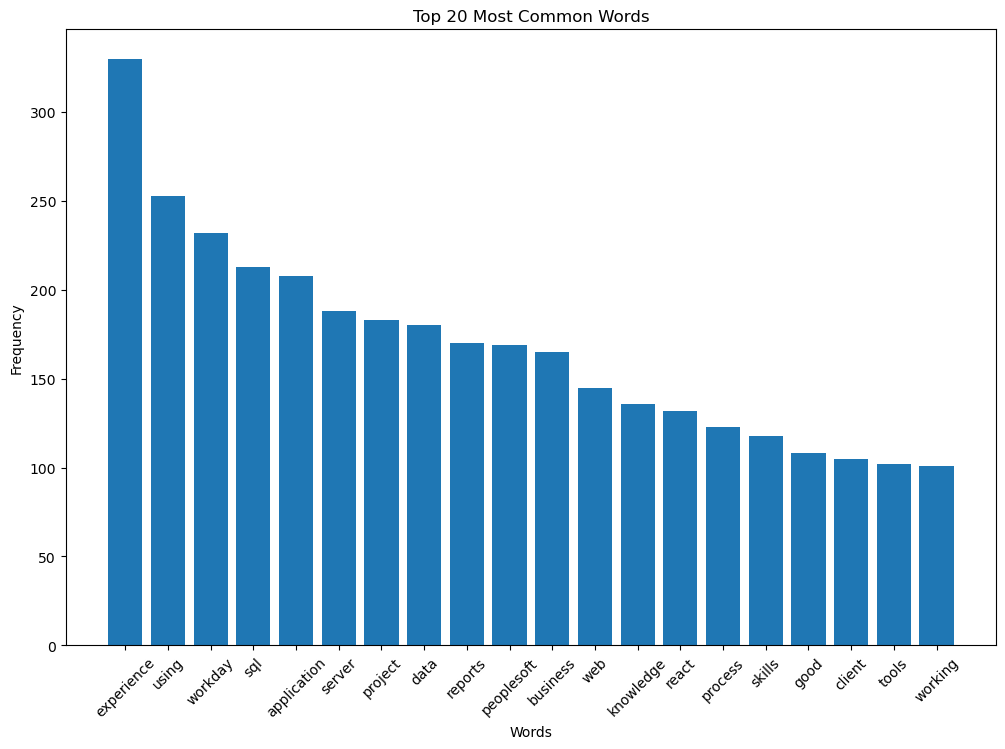

In [11]:
# Plot
plt.figure(figsize=(12, 8))
plt.bar([w[0] for w in top_words], [w[1] for w in top_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()

# Word Cloud

In [12]:
from wordcloud import WordCloud


In [13]:
# Generate a word cloud image
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(' '.join(data['Resume_Details']))


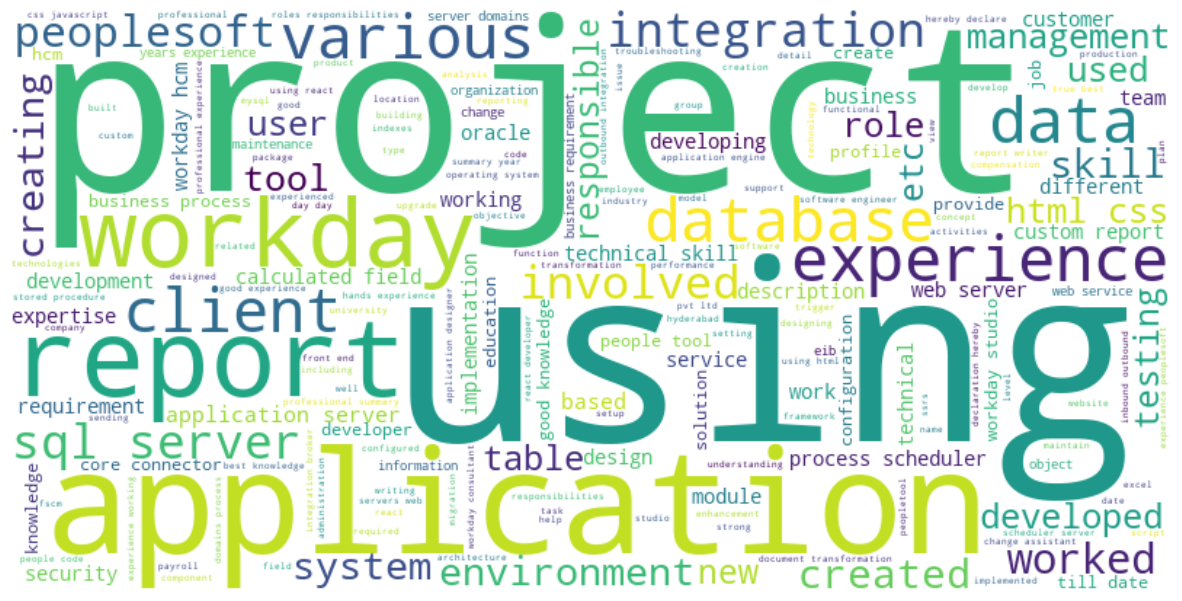

In [14]:
# Display the generated image:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Detailed Category Distribution

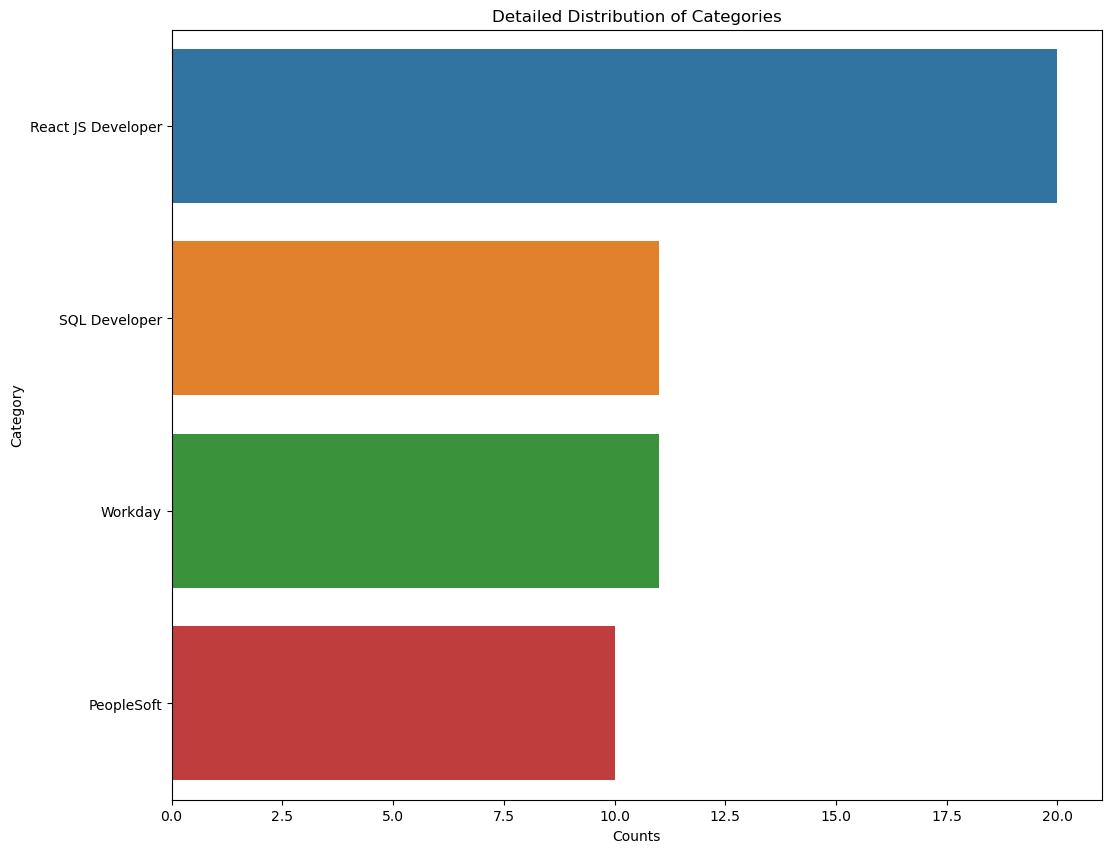

In [15]:
plt.figure(figsize=(12, 10))
sns.countplot(y='Category', data=data, order = data['Category'].value_counts().index)
plt.title('Detailed Distribution of Categories')
plt.xlabel('Counts')
plt.ylabel('Category')
plt.show()

In [ ]:
#Data Preprocessing

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [21]:
# Label Encoding for the target variable
encoder = LabelEncoder()
data['Category'] = encoder.fit_transform(data['Category'])

In [22]:
# Text vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(data['Resume_Details'])
y = data['Category']

In [23]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training Code:

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans


In [24]:
# Initialize more models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Means Clustering': KMeans(n_clusters=len(set(y)))  # Assuming labels are known
}

In [27]:
# Train and evaluate models (excluding K-Means for direct accuracy comparison, as it's unsupervised)
results = {}
for name, model in models.items():
    if name != 'K-Means Clustering':  # Exclude K-Means for accuracy testing
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
    else:
        # K-Means is used differently, here's a basic setup
        model.fit(X)
        # Typically, we would evaluate clustering differently, such as using silhouette score

# Display results
for name, accuracy in results.items():
    print(f'{name}: {accuracy}')

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Logistic Regression: 1.0
Random Forest: 1.0
SVM: 1.0
K-Nearest Neighbors: 1.0
Gradient Boosting: 1.0
Naive Bayes: 1.0
Decision Tree: 1.0


In [33]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


In [29]:
# Train and evaluate models (excluding K-Means for direct accuracy comparison, as it's unsupervised)
train_results = {}
test_results = {}
for name, model in models.items():
    if name != 'K-Means Clustering':  # Exclude K-Means for accuracy testing
        model.fit(X_train, y_train)
        # Predict on training data to measure training accuracy
        y_train_pred = model.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_results[name] = train_accuracy
        # Predict on testing data to measure testing accuracy
        y_test_pred = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_results[name] = test_accuracy

In [30]:
# Names of models
model_names = list(train_results.keys())


In [31]:
# Training and Testing accuracies
train_accuracies = [train_results[name] for name in model_names]
test_accuracies = [test_results[name] for name in model_names]


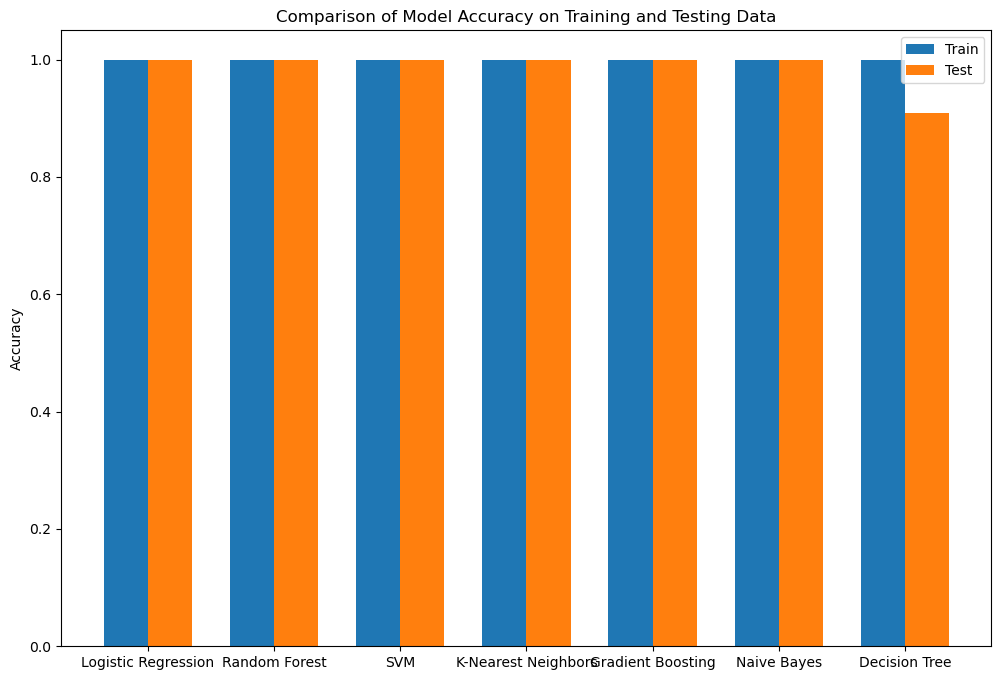

In [34]:
# Create bar positions
x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Train')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Accuracy on Training and Testing Data')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()